[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


✅ Sentiment analysis completed and saved as amazon_reviews_with_sentiment.csv
                                              Review  Rating  Sentiment Score  \
0  The product quality is amazing, totally worth ...       5           0.7419   
1      Worst purchase ever. Completely disappointed.       1          -0.8173   
2           It's okay, not great but not bad either.       3           0.4728   
3         Excellent build quality and fast delivery!       5           0.6114   
4  The item stopped working after a week. Very po...       1          -0.6478   

  Sentiment  
0  Positive  
1  Negative  
2  Positive  
3  Positive  
4  Negative  


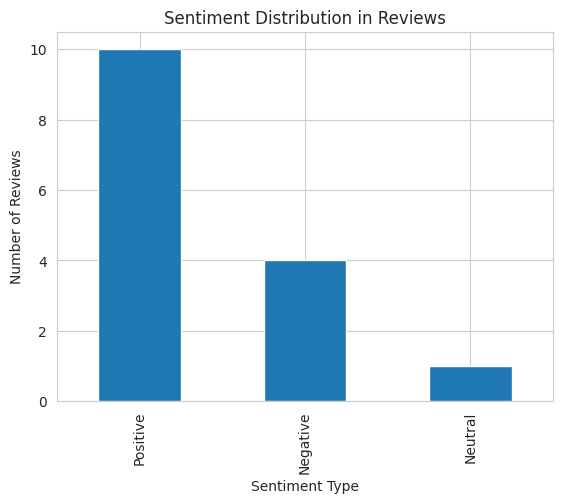

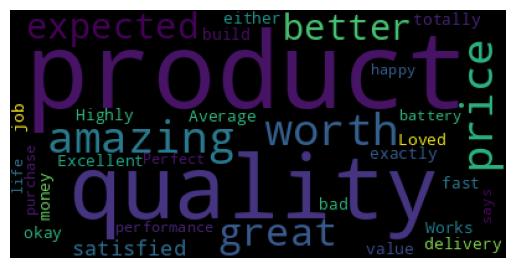

In [10]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv("amazon_reviews_dataset.csv")

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores
df["Sentiment Score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)['compound'])

# Convert score to categories
def get_sentiment(score):
    if score > 0.2:
        return "Positive"
    elif score < -0.2:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Sentiment Score"].apply(get_sentiment)

# Save results
df.to_csv("amazon_reviews_with_sentiment.csv", index=False)
print("✅ Sentiment analysis completed and saved as amazon_reviews_with_sentiment.csv")
print(df.head())

# Visualization: Sentiment Distribution
df["Sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution in Reviews")
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Reviews")
plt.show()

# WordCloud for Positive Sentiment
positive_text = " ".join(df[df["Sentiment"]=="Positive"]["Review"])
wordcloud = WordCloud().generate(positive_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

